<a href="https://colab.research.google.com/github/nicolinhainc/mypipeline/blob/master/FinalVersion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%pwd  

'/content'

In [0]:
%cd '/content'

/content


In [0]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1XdwGEqKXeKH1NRhZXxCZo5T8mncwYHCC' -O ./Bet-n-dcm2nii.zip
!unzip -q ./Bet-n-dcm2nii.zip
!rm -rf images

--2020-04-05 17:56:51--  https://drive.google.com/uc?export=download&id=1XdwGEqKXeKH1NRhZXxCZo5T8mncwYHCC
Resolving drive.google.com (drive.google.com)... 172.217.11.78, 2607:f8b0:4007:803::200e
Connecting to drive.google.com (drive.google.com)|172.217.11.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s52ksheeru9692htk518138bllmc8n2k/1586109375000/07380574639032097336/*/1XdwGEqKXeKH1NRhZXxCZo5T8mncwYHCC?e=download [following]
--2020-04-05 17:57:04--  https://doc-0k-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s52ksheeru9692htk518138bllmc8n2k/1586109375000/07380574639032097336/*/1XdwGEqKXeKH1NRhZXxCZo5T8mncwYHCC?e=download
Resolving doc-0k-60-docs.googleusercontent.com (doc-0k-60-docs.googleusercontent.com)... 172.217.11.65, 2607:f8b0:4007:802::2001
Connecting to doc-0k-60-docs.googleusercontent.com (doc-0k-60-docs.goo

In [0]:
# upload the LGG zip file yourself as the link to google drive wasnt working

In [0]:
!unzip -q ./LGG.zip
!rm -rf ./_MACOSX
!rm -rf *.DS_Store
!rm -rf ./LGG/.DS_Store
!rm -rf ./LGG/class1/.DS_Store
!rm -rf ./LGG/class2/.DS_Store

In [0]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1uBQdQIYcA_ACqycw8ofDzD-1G9YwZaRw' -O ./icbm152t2.zip
!unzip -q ./icbm152t2.zip

--2020-04-05 17:59:15--  https://drive.google.com/uc?export=download&id=1uBQdQIYcA_ACqycw8ofDzD-1G9YwZaRw
Resolving drive.google.com (drive.google.com)... 172.217.11.78, 2607:f8b0:4007:803::200e
Connecting to drive.google.com (drive.google.com)|172.217.11.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9srhp2fl0rj3un8ttr5ljb03etrrddik/1586109525000/07380574639032097336/*/1uBQdQIYcA_ACqycw8ofDzD-1G9YwZaRw?e=download [following]
--2020-04-05 17:59:16--  https://doc-0k-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9srhp2fl0rj3un8ttr5ljb03etrrddik/1586109525000/07380574639032097336/*/1uBQdQIYcA_ACqycw8ofDzD-1G9YwZaRw?e=download
Resolving doc-0k-60-docs.googleusercontent.com (doc-0k-60-docs.googleusercontent.com)... 172.217.11.65, 2607:f8b0:4007:802::2001
Connecting to doc-0k-60-docs.googleusercontent.com (doc-0k-60-docs.goo

In [0]:
NIFTI_PATH = './LGG/class2'

In [0]:
import os, fnmatch

In [0]:
os.environ['FSLOUTPUTTYPE'] = 'NIFTI_GZ'

In [0]:
for subj in os.listdir(NIFTI_PATH):
    subj_path = os.path.join(NIFTI_PATH, subj)
    print ("Working on " + subj_path)
    series = fnmatch.filter(os.listdir(subj_path), '*.nii.gz')
    for ser in ['T2*']: #not sure why I had to add the star here but this was the only way it worked
        nii_file = os.path.join (subj_path, ser)
# First, perform N4 bias correction. Not required, but may improve results. Also must track new names
        new_file = os.path.join (subj_path, 'N4-' + ser)
        cmd = "./N4BiasFieldCorrection -i %s.nii.gz -o %s.nii.gz" % (nii_file, new_file)
        os.system(cmd)
        print (cmd)

Working on ./LGG/class2/Patient8
./N4BiasFieldCorrection -i ./LGG/class2/Patient8/T2*.nii.gz -o ./LGG/class2/Patient8/N4-T2*.nii.gz
Working on ./LGG/class2/Patient10
./N4BiasFieldCorrection -i ./LGG/class2/Patient10/T2*.nii.gz -o ./LGG/class2/Patient10/N4-T2*.nii.gz
Working on ./LGG/class2/Patient9
./N4BiasFieldCorrection -i ./LGG/class2/Patient9/T2*.nii.gz -o ./LGG/class2/Patient9/N4-T2*.nii.gz
Working on ./LGG/class2/Patient7
./N4BiasFieldCorrection -i ./LGG/class2/Patient7/T2*.nii.gz -o ./LGG/class2/Patient7/N4-T2*.nii.gz
Working on ./LGG/class2/Patient6
./N4BiasFieldCorrection -i ./LGG/class2/Patient6/T2*.nii.gz -o ./LGG/class2/Patient6/N4-T2*.nii.gz


In [0]:
for subj in os.listdir(NIFTI_PATH):
    subj_path = os.path.join(NIFTI_PATH, subj)
    print ("Working on " + subj_path)
    series = fnmatch.filter(os.listdir(subj_path), '*.nii.gz')
    for ser in ['T2.nii.gz']: #not sure why I had to add the star here but this was the only way it worked
        nii_file = os.path.join (subj_path, ser)
# removes old files
        
        cmd = os.remove(nii_file)
        
        print (cmd)

Working on ./LGG/class1/Patient2
None
Working on ./LGG/class1/Patient5
None
Working on ./LGG/class1/Patient4
None
Working on ./LGG/class1/Patient1
None
Working on ./LGG/class1/Patient3
None


In [0]:
# Next, Register the images to the avg 152 t2 image from MNI
for subj in os.listdir(NIFTI_PATH):
    subj_path = os.path.join(NIFTI_PATH, subj)
    print ("Working on " + subj_path)
    series = fnmatch.filter(os.listdir(subj_path), 'N4-*')
    for ser in ['T2']:   
        MNI_file = './icbm_avg_152_t2_tal_lin.nii'
        T2_file =  os.path.join (subj_path, 'N4-T2*.nii.gz')
        new_file = os.path.join (subj_path, 'Reg-N4-T2.nii.gz')
        cmd = "./flirt -in %s -ref %s  -out %s" % (T2_file, MNI_file, new_file)
        os.system(cmd)
        print (cmd)



Working on ./LGG/class2/Patient8
./flirt -in ./LGG/class2/Patient8/N4-T2*.nii.gz -ref ./icbm_avg_152_t2_tal_lin.nii  -out ./LGG/class2/Patient8/Reg-N4-T2.nii.gz
Working on ./LGG/class2/Patient10
./flirt -in ./LGG/class2/Patient10/N4-T2*.nii.gz -ref ./icbm_avg_152_t2_tal_lin.nii  -out ./LGG/class2/Patient10/Reg-N4-T2.nii.gz
Working on ./LGG/class2/Patient9
./flirt -in ./LGG/class2/Patient9/N4-T2*.nii.gz -ref ./icbm_avg_152_t2_tal_lin.nii  -out ./LGG/class2/Patient9/Reg-N4-T2.nii.gz
Working on ./LGG/class2/Patient7
./flirt -in ./LGG/class2/Patient7/N4-T2*.nii.gz -ref ./icbm_avg_152_t2_tal_lin.nii  -out ./LGG/class2/Patient7/Reg-N4-T2.nii.gz
Working on ./LGG/class2/Patient6
./flirt -in ./LGG/class2/Patient6/N4-T2*.nii.gz -ref ./icbm_avg_152_t2_tal_lin.nii  -out ./LGG/class2/Patient6/Reg-N4-T2.nii.gz


In [0]:
# Next, remove the unnecessary N4-T2 files
for subj in os.listdir(NIFTI_PATH):
    subj_path = os.path.join(NIFTI_PATH, subj)
    print ("Working on " + subj_path)
    series = fnmatch.filter(os.listdir(subj_path), 'N4-*')
    for ser in ['T2']:   
        MNI_file = './icbm_avg_152_t2_tal_lin.nii'
        T2_file =  os.path.join (subj_path, 'N4-T2*.nii.gz')
        new_file = os.path.join (subj_path, 'Reg-N4-T2.nii.gz')
        cmd = os.remove(T2_file)
        
        print (cmd)

Working on ./LGG/class2/Patient8
None
Working on ./LGG/class2/Patient10
None
Working on ./LGG/class2/Patient9
None
Working on ./LGG/class2/Patient7
None
Working on ./LGG/class2/Patient6
None


In [0]:
#manually create the valc1 and valc2 folders to make sure it works
#below ref https://stackoverflow.com/questions/46717742/split-data-directory-into-training-and-test-directory-with-sub-directory-structu

In [0]:
   import os
   import shutil
   import numpy as np
   base_dir = '/content'

   sourceN = base_dir + "/LGG/class1"
   destN = base_dir + "/LGG/valc1"
   sourceP = base_dir + "/LGG/class2"
   destP = base_dir + "/LGG/valc2"

   filesN = os.listdir(sourceN)
   filesP = os.listdir(sourceP)       

   for f in filesN:
       if np.random.rand(1) < 0.2: #is this a 80 20 split? what does it mean exactly?
        shutil.move(sourceN + '/'+ f, destN + '/'+ f)

   for i in filesP:
       if np.random.rand(1) < 0.2:
        shutil.move(sourceP + '/'+ i, destP + '/'+ i)

   print(len(os.listdir(sourceN)))
   print(len(os.listdir(sourceP)))
   print(len(os.listdir(destN)))
   print(len(os.listdir(destP)))

0
2
5
3


In [0]:
!rm -rf ./LGG/valc2/.ipynb_checkpoints
!rm -rf ./LGG/valc1/.ipynb_checkpoints

In [0]:
import pandas as pd

!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1z2GmRDDVMbcb1x26jlA9X0M4WAv4-kvA' -O ./TumorSlices.csv
df = pd.read_csv ('./TumorSlices.csv')
print (df) 

--2020-04-05 18:53:34--  https://drive.google.com/uc?export=download&id=1z2GmRDDVMbcb1x26jlA9X0M4WAv4-kvA
Resolving drive.google.com (drive.google.com)... 172.217.14.78, 2607:f8b0:4007:803::200e
Connecting to drive.google.com (drive.google.com)|172.217.14.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4t96a5ag1r8spnpk009kik8038hpbnsd/1586112750000/07380574639032097336/*/1z2GmRDDVMbcb1x26jlA9X0M4WAv4-kvA?e=download [following]
--2020-04-05 18:53:34--  https://doc-10-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4t96a5ag1r8spnpk009kik8038hpbnsd/1586112750000/07380574639032097336/*/1z2GmRDDVMbcb1x26jlA9X0M4WAv4-kvA?e=download
Resolving doc-10-60-docs.googleusercontent.com (doc-10-60-docs.googleusercontent.com)... 172.217.11.65, 2607:f8b0:4007:802::2001
Connecting to doc-10-60-docs.googleusercontent.com (doc-10-60-docs.goo

In [0]:
# Cell #5
# create new versions of the T1, GAD, and T2 images that range from 0 to 255, and where the 0 intensity value maps to the 5th percentile value 
# and 255 maps to the 95th percentile value.
import imageio
import nibabel as nib
import numpy as np

MIN_MR = 20

def rescale_5_95_percentile(image):
    dims = np.shape(image)
    image_1d = image.reshape(1, image.size)
    above = np.where(image_1d>MIN_MR, image_1d, image_1d)
    if above.size < image_1d.size/2:
        above = image_1d # avoid bad MIN_MR thresholds
    sorted_im = np.sort(above, axis = None)
    
    start = int(sorted_im.size / 20)  # 20 = 5%
    end = int(sorted_im.size * 19 / 20) # 95%
    start_val = sorted_im[start]
    end_val = sorted_im[end]
    
    image = np.maximum(image, start_val) # map values below the start_val to start_val
    image = np.minimum(image, end_val)   # map values above the end_val to end_val
    image = image - start_val # subtract the starting intensity

 #   print ("rescaling range " + str(newmin) + " to " + str(histo[1][index]))
    image = (np.maximum(image, 0) / image.max()) * 255.0
    return image

def nifti_to_img(red_file, green_file, blue_file, not_dir, yes_dir, startSlice, endSlice, subject):
### red_ green_ and blue_files are the nifit files that will be combined to go into the PNG
### not_dir is the direcotry where PNGs are stored if they are not in the (inclusive)
### range set by startSlice/endSlice
### yes_dir is where they are stored when they ARE in the range
### subject is the ID so that we can track where images came from

    try:
        nifti = nib.load(red_file)
        nif_header = nifti.header
        red_image = nifti.get_fdata()
    except:
        return 0

    try:
        if os.path.isfile(green_file):
            nifti = nib.load(green_file)
            nif_header = nifti.header
            green_image = nifti.get_fdata()
        else:
            pass
    except:  # if can't load, then use red image
        green_image = red_image
    
    try:
        if os.path.isfile(blue_file):
            nifti = nib.load(blue_file)

            nif_header = nifti.header
            blue_image = nifti.get_fdata()
        else:
            pass
    except:  # if can't load, then use red image
        blue_image = red_image
        
# now scale the intensity for each image        
    red_image = rescale_5_95_percentile(red_image)
    green_image = rescale_5_95_percentile(green_image)
    blue_image = rescale_5_95_percentile(blue_image)
# then convert to 8 bits
    red_image = red_image.astype(np.uint8)     
    green_image = green_image.astype(np.uint8)     
    blue_image = blue_image.astype(np.uint8)   
    
# get the number of slices
    dims = np.shape(red_image)
    zd = dims[2]

    for z in range(0, zd):
        outname = subject + "-{0:04d}".format(z) + '.png'
        if z >= startSlice and z <= endSlice:  # this is enhancing
            out_dir = yes_dir
        else:
            out_dir = not_dir
        outname = os.path.join(out_dir, outname)
        if not os.path.exists(out_dir):
            os.makedirs(out_dir)
        combined = np.dstack((red_image[:,:,z],green_image[:,:,z],
                              blue_image[:,:,z]))
## . images come in rotated
        combined = np.rot90(combined, k=1)
#        print ('Name: ' + outname)
        imageio.imwrite(outname, combined)
    return zd

In [0]:
NIFTI_PATH = './LGG/valc1'

In [0]:
# Cell #6
# take the GAD nii, scale it to 0-255 and store that into the red channel
# same for T1 (green) and T2 (blue)
# PNG files are stored in enh / nonenh folders based on the csv file

# store the png files into enhancing or nonenhancing folders after making sure they are cleared

!rm -rf classified

!mkdir classified

for subj in os.listdir(NIFTI_PATH):
    subj_path = os.path.join(NIFTI_PATH, subj)
    red_f = os.path.join(subj_path, 'Reg-N4-T2.nii.gz')
    startSlice = df.loc[df.Subject == subj, 'StartSlice'].values[0]
    endSlice = df.loc[df.Subject == subj, 'EndSlice'].values[0]
    print ("Making PNG file for " + subj + " start: " + str(startSlice) + " end: " + str(endSlice))
    count = nifti_to_img(red_f, red_f, red_f,'./png/valc1', './png/valc1', startSlice, endSlice, subj)

Making PNG file for Patient2 start: 0 end: 300
Making PNG file for Patient3 start: 0 end: 300


In [0]:
!unzip -q ./png.zip

In [2]:
%cd '/content'

/content


In [0]:
#below code is from https://towardsdatascience.com/keras-transfer-learning-for-beginners-6c9b8b7143e
#and https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a
#get the githubs for the refs in the paper

0 input_3
1 stem_conv1
2 stem_bn1
3 activation_520
4 reduction_conv_1_stem_1
5 reduction_bn_1_stem_1
6 activation_521
7 activation_523
8 separable_conv_1_pad_reduction_left1_stem_1
9 separable_conv_1_pad_reduction_right1_stem_1
10 separable_conv_1_reduction_left1_stem_1
11 separable_conv_1_reduction_right1_stem_1
12 separable_conv_1_bn_reduction_left1_stem_1
13 separable_conv_1_bn_reduction_right1_stem_1
14 activation_522
15 activation_524
16 separable_conv_2_reduction_left1_stem_1
17 separable_conv_2_reduction_right1_stem_1
18 activation_525
19 separable_conv_2_bn_reduction_left1_stem_1
20 separable_conv_2_bn_reduction_right1_stem_1
21 separable_conv_1_pad_reduction_right2_stem_1
22 activation_527
23 reduction_add_1_stem_1
24 separable_conv_1_reduction_right2_stem_1
25 separable_conv_1_pad_reduction_right3_stem_1
26 activation_529
27 separable_conv_1_bn_reduction_right2_stem_1
28 separable_conv_1_reduction_right3_stem_1
29 separable_conv_1_reduction_left4_stem_1
30 activation_526
31 s

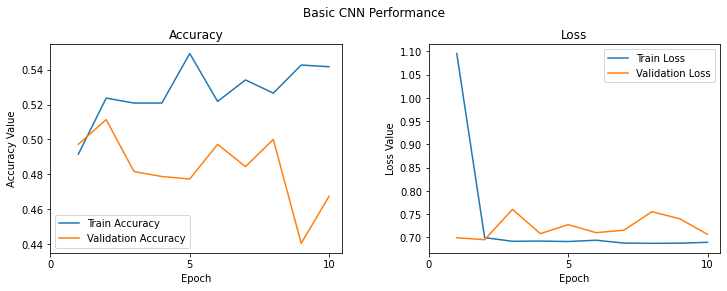

In [10]:
# Cell #7
# now we are ready to load data and train classifier
# while we did this in separate cells before, we will do it all in one
# this should look familiar.
import numpy as np
import tensorflow as tf
!pip install tensornets
import tensornets as nets
import tensorflow_hub as hub
import keras
import tensorflow.keras 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.nasnet import NASNetLarge, NASNetMobile, preprocess_input
directory = "./content"

base_model=tensorflow.keras.applications.nasnet.NASNetLarge(input_shape=(331, 331, 3), include_top=False, weights='imagenet', input_tensor=None, pooling=None) #imports the nasnet large model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation, for 2 classes

model=Model(inputs=base_model.input,outputs=preds) # to load saved model with weights use model= tensorflow.keras.models.load_model('myLGGtestmodel.h5')
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

for i,layer in enumerate(model.layers):
  print(i,layer.name)

for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:1039]:
    layer.trainable=False
for layer in model.layers[1039:]:
    layer.trainable=True

train_datagen=ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0, fill_mode='nearest', horizontal_flip=False, data_format='channels_last', validation_split=0.0, dtype='float32') #included in our dependencies
# add the directory below very important ##########################

train_generator=train_datagen.flow_from_directory('./train',
                                                 target_size=(331,331),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

val_datagen=ImageDataGenerator()

val_generator=val_datagen.flow_from_directory('./validate',
                                                 target_size=(331,331),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=False)

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
step_size_val=val_generator.n//val_generator.batch_size
#model.fit_generator(generator=train_generator,
#                   steps_per_epoch=step_size_train,
#                   epochs=3)

history = model.fit_generator(train_generator, steps_per_epoch=step_size_train, epochs=10,
                              validation_data=val_generator, validation_steps=step_size_val, 
                              verbose=1)       

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 11, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 11, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")
    
# next cell to save model including newly trained weights
# model.save('myLGGtestmodel.h5') # rename it how you like, it will show up in your directory. I have explained above using a hastag how and where to load the model.

In [0]:
#above tips for the graph function: list range has to be 1 to #epochs+1
#np.arrange has to be 0, #epochs +1 and no clue what the last number is.

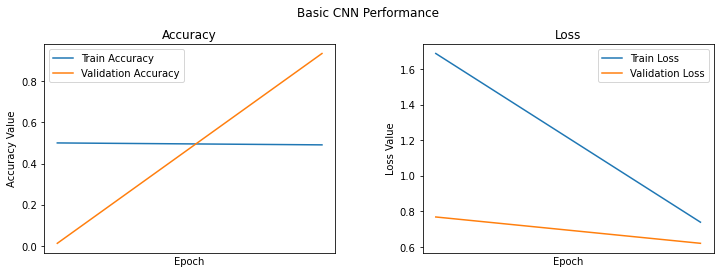

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 11, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 11, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")